In [ ]:
import pandas as pd


lista_conceptos = [
    "DiarioTs",
    "Humedad", 
    "PresionQFF", 
    "Temperatura", 
    "Viento", 
    "Agua24Horas", 
    "Agua6Horas", 
    "DiarioRR", 
    "PresionQFE", 
    "PuntoRocio", 
    "TMaxima", 
    "TMinima", 
    "IndiceUVB"
]



In [18]:
df = pd.read_csv("data/180005_XXXX_Temperatura_.csv", delimiter=";")
df.head()

concepto = "DiarioTs"
ruta = f"data/{concepto}_consolidado.csv"

df = pd.read_csv(ruta, delimiter=";")

df.head()

,CodigoNacional,momento,MediaCli_Valor,MediaAri_Valor,NumDatos_Valor,Ts00_Valor,Ts12_Valor,Maxima_Valor,FechaMax_Valor,Minima_Valor,FechaMin_Valor,FechaPro_Valor
0,180005,01-01-1955 12:00:00,NaN,25.7,4.0,NaN,21.6,28.5,NaN,NaN,NaN,NaN
1,180005,02-01-1955 12:00:00,NaN,27.3,4.0,NaN,24.0,31.2,NaN,NaN,NaN,NaN
2,180005,03-01-1955 12:00:00,NaN,26.6,4.0,NaN,23.0,30.8,NaN,NaN,NaN,NaN
3,180005,04-01-1955 12:00:00,NaN,26.2,4.0,NaN,22.7,31.4,NaN,NaN,NaN,NaN
4,180005,05-01-1955 12:00:00,NaN,26.7,4.0,NaN,23.5,31.8,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

CodigoNacional      int64
momento            object
MediaCli_Valor    float64
MediaAri_Valor    float64
NumDatos_Valor    float64
Ts00_Valor        float64
Ts12_Valor        float64
Maxima_Valor      float64
FechaMax_Valor    float64
Minima_Valor      float64
FechaMin_Valor    float64
FechaPro_Valor    float64
dtype: object

In [12]:
### Lectura de estaciones ### 

dt_df = pd.read_html("data/CatastrodeEstacionesdelSistemaSACLIM_2025-02-16_21_13.xls")[0]

print(dt_df.dtypes)

lista_estaciones = dt_df["Codigo Nacional"].values

print("Cantidad de estaciones:", len(lista_estaciones),"\n")
print(lista_estaciones,"\n")

dt_df.head()

NÂ°                  int64
Codigo Nacional      int64
Codigo WIGOS        object
Codigo OACI         object
Nombre              object
Latitud            float64
Longitud           float64
Altitud (Mts)        int64
Propietario         object
dtype: object
Cantidad de estaciones: 46 

[180005 200006 220002 230001 270001 270008 290004 320041 320051 330007
 330019 330020 330021 330030 330031 330066 330077 330111 330112 330113
 330163 340031 360011 360019 360042 370033 380029 390006 400009 410005
 420014 430002 430004 430009 450001 450004 450005 460001 470001 510005
 520006 530005 550001 950001 950002 950003] 



,NÂ°,Codigo Nacional,Codigo WIGOS,Codigo OACI,Nombre,Latitud,Longitud,Altitud (Mts),Propietario
0,0,180005,0-20000-0-85406,SCAR,"Chacalluta, Arica Ap.",-18.35555,-70.34028,51,DMC
1,1,200006,0-20000-0-85418,SCDA,Diego Aracena Iquique Ap.,-20.54917,-70.18111,48,DMC
2,2,220002,0-20000-0-85432,SCCF,"El Loa, Calama Ad.",-22.49806,-68.89250,2321,DMC
3,3,230001,0-20000-0-85442,SCFA,Cerro Moreno Antofagasta Ap.,-23.45361,-70.44528,139,DMC
4,4,270001,0-20000-0-85469,SCIP,Mataveri Isla de Pascua Ap.,-27.15889,-109.43250,69,DMC


In [10]:
# Filtrar las estaciones cuyo nombre contiene la palabra "Santiago"
estaciones_santiago = dt_df[dt_df['Nombre'].str.contains('Santiago', case=False, na=False)]

# Mostrar el resultado
print(estaciones_santiago)

codigo_quinta_normal = 330020

    NÂ°  Codigo Nacional     Codigo WIGOS Codigo OACI  \
11   11           330020  0-20000-0-85577        SCQN   
12   12           330021  0-20000-0-85574        SCEL   

                     Nombre   Latitud  Longitud  Altitud (Mts) Propietario  
11  Quinta Normal, Santiago -33.44500 -70.68278            520         DMC  
12        Pudahuel Santiago -33.37833 -70.78778            474         DMC  


In [19]:
import numpy as np

# Ver una muestra aleatoria de valores únicos de la columna "momento" antes de la conversión
muestra_aleatoria = np.random.choice(df['momento'].unique(), size=10, replace=False)

# Mostrar la muestra
print("Muestra aleatoria de valores únicos en la columna 'momento':")
print(muestra_aleatoria)


Muestra aleatoria de valores únicos en la columna 'momento':
['23-01-2022 12:00:00' '22-02-1976 12:00:00' '29-04-2010 15:00:00'
 '17-12-2004 12:00:00' '01-06-1973 15:00:00' '09-02-1981 12:00:00'
 '26-07-1994 15:00:00' '08-07-1991 15:00:00' '07-09-2004 15:00:00'
 '10-07-1999 12:00:00']


In [20]:
# Ver los valores que no puedan convertirse a fechas
no_fecha = df[~pd.to_datetime(df['momento'], errors='coerce').notna()]

# Mostrar los primeros 10 valores que no son fechas
print("Valores que no son fechas:")
print(no_fecha['momento'].head(10))


Valores que no son fechas:
12    13-01-1955 12:00:00
13    14-01-1955 12:00:00
14    15-01-1955 12:00:00
15    16-01-1955 12:00:00
16    17-01-1955 12:00:00
17    18-01-1955 12:00:00
18    19-01-1955 12:00:00
19    20-01-1955 12:00:00
20    21-01-1955 12:00:00
21    22-01-1955 12:00:00
Name: momento, dtype: object


In [21]:
# Filtrar los valores que sí se convierten a fechas válidas
fecha_valida = df[pd.to_datetime(df['momento'], errors='coerce').notna()]

# Mostrar los primeros 10 valores que se han convertido correctamente
print("Valores que sí son fechas válidas:")
print(fecha_valida['momento'].head(10))


Valores que sí son fechas válidas:
0    01-01-1955 12:00:00
1    02-01-1955 12:00:00
2    03-01-1955 12:00:00
3    04-01-1955 12:00:00
4    05-01-1955 12:00:00
5    06-01-1955 12:00:00
6    07-01-1955 12:00:00
7    08-01-1955 12:00:00
8    09-01-1955 12:00:00
9    10-01-1955 12:00:00
Name: momento, dtype: object


In [22]:
# Verificar el total de filas del DataFrame
total_filas = df.shape[0]
print(f'Total de filas: {total_filas}')

# Verificar la cantidad de valores nulos en la columna "momento"
nulos_momento = df["momento"].isna().sum()
print(f'Cantidad de valores nulos en "momento": {nulos_momento}')

# # Convertir la columna "momento" a tipo datetime
# df['momento'] = pd.to_datetime(df['momento'], errors='coerce')

# Convertir la columna "momento" a tipo datetime con formato especificado
df['momento'] = pd.to_datetime(df['momento'], format='%d-%m-%Y %H:%M:%S', errors='coerce')

# Verificar el tipo de datos de las columnas
print(df.dtypes)

# Verificar nuevamente la cantidad de valores nulos en la columna "momento"
nulos_momento = df["momento"].isna().sum()
print(f'Cantidad de valores nulos en "momento" después de la conversión: {nulos_momento}')


Total de filas: 826378
Cantidad de valores nulos en "momento": 0
CodigoNacional             int64
momento           datetime64[ns]
MediaCli_Valor           float64
MediaAri_Valor           float64
NumDatos_Valor           float64
Ts00_Valor               float64
Ts12_Valor               float64
Maxima_Valor             float64
FechaMax_Valor           float64
Minima_Valor             float64
FechaMin_Valor           float64
FechaPro_Valor           float64
dtype: object
Cantidad de valores nulos en "momento" después de la conversión: 0


In [24]:
# Mostrar 20 filas aleatorias del DataFrame
df_random = df.sample(n=20, random_state=42)  # random_state para reproducibilidad
df_random


,CodigoNacional,momento,MediaCli_Valor,MediaAri_Valor,NumDatos_Valor,Ts00_Valor,Ts12_Valor,Maxima_Valor,FechaMax_Valor,Minima_Valor,FechaMin_Valor,FechaPro_Valor
190971,330019,1985-08-12 12:00:00,12.1,15.4,12.0,NaN,3.6,21.2,NaN,3.0,NaN,NaN
43,180005,1955-02-13 12:00:00,NaN,26.7,4.0,NaN,19.8,NaN,NaN,16.0,NaN,NaN
682013,470001,2001-09-29 12:00:00,10.4,14.6,11.0,NaN,4.0,19.6,2001.0,1.2,2001.0,NaN
304692,330066,2016-05-06 12:00:00,NaN,16.0,10.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
777288,950001,2021-12-21 12:00:00,-0.2,0.1,18.0,0.0,-0.2,1.3,2021.0,-1.6,2021.0,NaN
449805,390006,2005-05-14 12:00:00,7.0,8.6,11.0,NaN,NaN,12.8,2005.0,1.2,2005.0,NaN
504284,410005,2019-04-10 12:00:00,10.9,10.9,24.0,10.6,9.4,12.1,2019.0,9.4,2019.0,NaN
586261,450001,2011-02-03 12:00:00,12.6,12.9,9.0,NaN,9.4,16.8,2011.0,8.4,2011.0,NaN
577563,450001,1987-04-12 12:00:00,10.6,10.1,5.0,9.4,9.4,12.8,1987.0,8.4,1987.0,NaN
281647,330031,1965-05-17 12:00:00,11.5,12.1,5.0,NaN,7.4,16.7,NaN,6.3,NaN,NaN


In [25]:
# Calcular el promedio anual de la columna 'MediaCli_Valor'
df['año'] = df['momento'].dt.year  # Extraer el año de la columna 'momento'
promedio_anual = df.groupby('año')['MediaCli_Valor'].mean()

# Mostrar el promedio anual
print(promedio_anual)


año
1950    12.309595
1951    14.448023
1952    11.978630
1953    11.436224
1954     9.519216
          ...    
2021    11.398171
2022    10.921250
2023    11.205716
2024    10.771175
2025    16.167814
Name: MediaCli_Valor, Length: 76, dtype: float64


In [27]:
!pip install matplotlib

     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --------------------- --------------- 61.4/104.0 kB 825.8 kB/s eta 0:00:01
     ------------------------------------ 104.0/104.0 kB 997.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 7.5 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.1 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/8.1 MB 3.3 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.1 MB 5.2 MB/s eta 0:00:02
   -------- ------------------------------- 1.7/8.1 MB 7.7 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/8.1 MB 9.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/8.1 MB 13.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.7/8.1 MB 16.0 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


año
1950          NaN
1951          NaN
1952          NaN
1953          NaN
1954          NaN
          ...    
2021    16.102192
2022    16.086575
2023    16.807397
2024    16.468306
2025    24.533333
Name: Ts00_Valor, Length: 76, dtype: float64


C:\Users\lcarv\AppData\Local\Temp\ipykernel_17712\98075812.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['año'] = df_filtrado['momento'].dt.year  # Extraer el año de la columna 'momento'


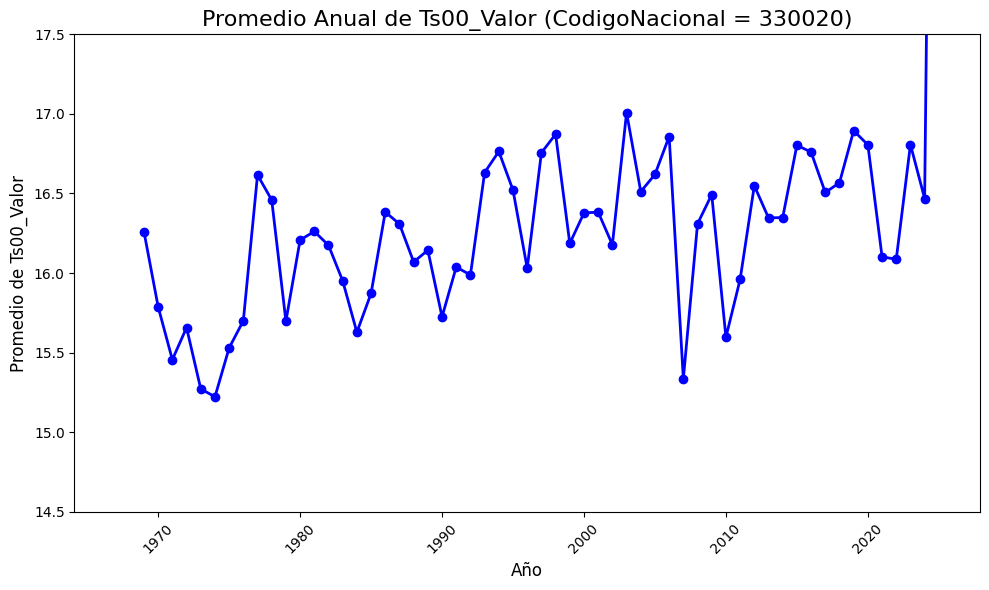

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para que solo tenga datos con CodigoNacional == 330020
df_filtrado = df[df['CodigoNacional'] == 330020]

# Calcular el promedio anual de la columna 'Ts00_Valor'
df_filtrado['año'] = df_filtrado['momento'].dt.year  # Extraer el año de la columna 'momento'
promedio_anual_ts00 = df_filtrado.groupby('año')['Ts00_Valor'].mean()

# Mostrar el promedio anual
print(promedio_anual_ts00)

# Crear gráfico de línea del promedio anual
plt.figure(figsize=(10, 6))
promedio_anual_ts00.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)

# Títulos y etiquetas
plt.title('Promedio Anual de Ts00_Valor (CodigoNacional = 330020)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Ts00_Valor', fontsize=12)

# Ajustar el límite del eje Y
plt.ylim(14.5, 17.5)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


año
1950          NaN
1951          NaN
1952          NaN
1953          NaN
1954          NaN
          ...    
2020    16.805738
2021    16.102192
2022    16.086575
2023    16.807397
2024    16.468306
Name: Ts00_Valor, Length: 75, dtype: float64


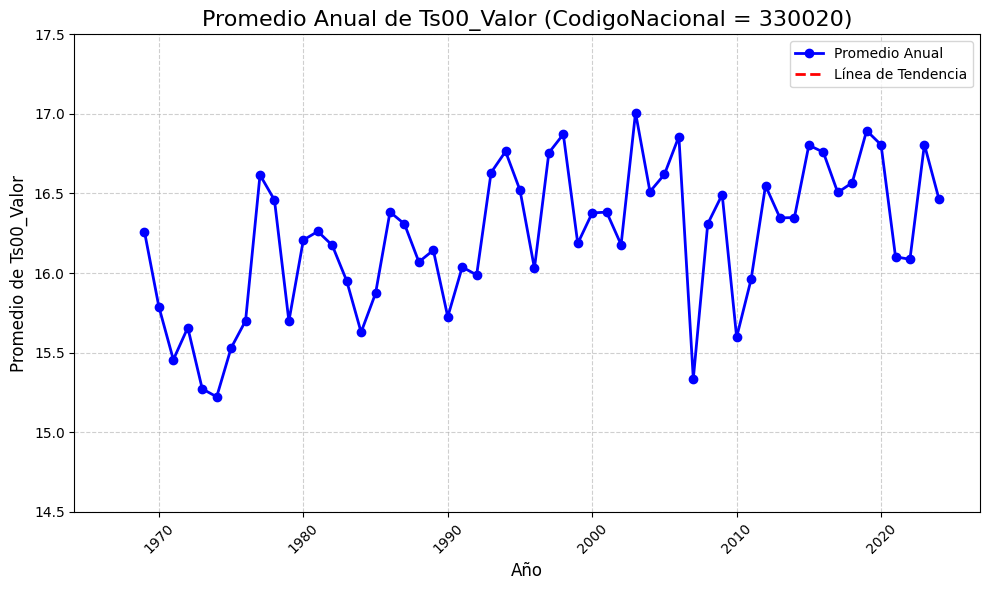

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrar el DataFrame para que solo tenga datos con CodigoNacional == 330020 y excluir el año 2025
df_filtrado = df.copy()[(df['CodigoNacional'] == 330020) & (df['momento'].dt.year != 2025)]

# Calcular el promedio anual de la columna 'Ts00_Valor'
df_filtrado['año'] = df_filtrado['momento'].dt.year  # Extraer el año de la columna 'momento'
promedio_anual_ts00 = df_filtrado.groupby('año')['Ts00_Valor'].mean()

# Mostrar el promedio anual
print(promedio_anual_ts00)

# # Crear gráfico de línea del promedio anual
plt.figure(figsize=(10, 6))
promedio_anual_ts00.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6, label='Promedio Anual')

# Ajustar una línea de tendencia (polinomio de grado 1)
años = promedio_anual_ts00.index
valores = promedio_anual_ts00.values
coeficientes = np.polyfit(años, valores, 1)  # Ajustar una línea recta (grado 1)
tendencia = np.poly1d(coeficientes)  # Crear una función para la línea de tendencia

# Graficar la línea de tendencia
plt.plot(años, tendencia(años), color='red', linestyle='--', linewidth=2, label='Línea de Tendencia')

# Títulos y etiquetas
plt.title('Promedio Anual de Ts00_Valor (CodigoNacional = 330020)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Ts00_Valor', fontsize=12)

# Ajustar el límite del eje Y
plt.ylim(14.5, 17.5)

# Añadir cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Promedio Anual:
año
1950          NaN
1951          NaN
1952          NaN
1953          NaN
1954          NaN
          ...    
2020    16.805738
2021    16.102192
2022    16.086575
2023    16.807397
2024    16.468306
Name: Ts00_Valor, Length: 75, dtype: float64

Media Móvil de 4 años:
año
1950          NaN
1951          NaN
1952          NaN
1953          NaN
1954          NaN
          ...    
2020    16.693558
2021    16.592530
2022    16.472325
2023    16.450476
2024    16.366118
Name: Ts00_Valor, Length: 75, dtype: float64


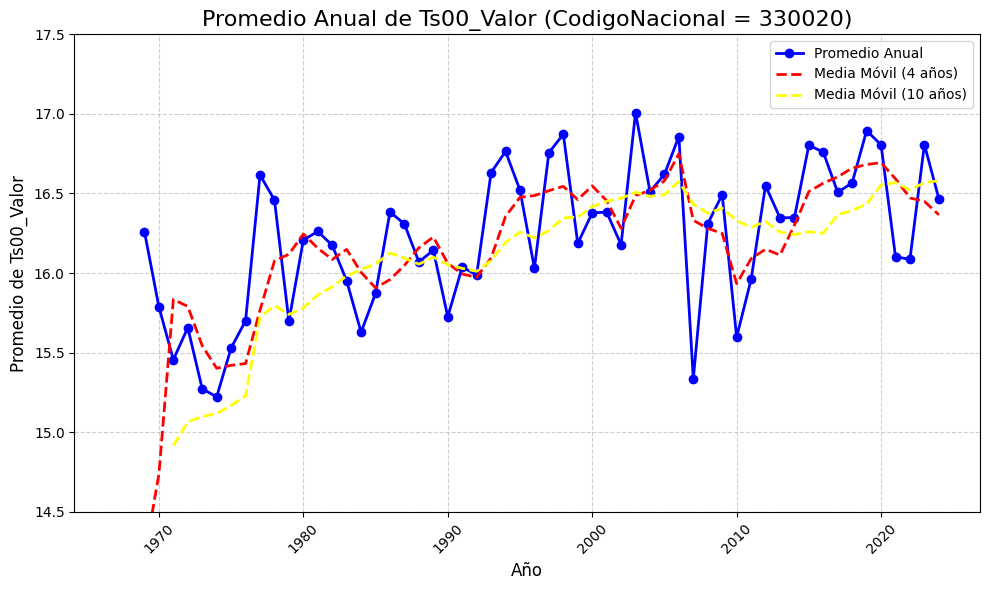

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'momento' sea de tipo datetime
df['momento'] = pd.to_datetime(df['momento'])

# Filtrar el DataFrame para que solo tenga datos con CodigoNacional == 330020
df_filtrado = df.copy()[(df['CodigoNacional'] == 330020) & (df['momento'].dt.year != 2025)]

# Calcular el promedio anual de la columna 'Ts00_Valor'
df_filtrado['año'] = df_filtrado['momento'].dt.year  # Extraer el año de la columna 'momento'
promedio_anual_ts00 = df_filtrado.groupby('año')['Ts00_Valor'].mean()

# Calcular la media móvil de 4 años
media_movil_4 = promedio_anual_ts00.rolling(window=4, min_periods=2).mean()

media_movil_7 = promedio_anual_ts00.rolling(window=7, min_periods=3).mean()

media_movil_10 = promedio_anual_ts00.rolling(window=10, min_periods=4).mean()

# Mostrar el promedio anual y la media móvil
print("Promedio Anual:")
print(promedio_anual_ts00)
print("\nMedia Móvil de 4 años:")
print(media_movil_4)

# Crear gráfico de línea del promedio anual y la media móvil
plt.figure(figsize=(10, 6))
promedio_anual_ts00.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6, label='Promedio Anual')
media_movil_4.plot(kind='line', color='red', linestyle='--', linewidth=2, label='Media Móvil (4 años)')
#media_movil_7.plot(kind='line', color='green', linestyle='--', linewidth=2, label='Media Móvil (7 años)')
media_movil_10.plot(kind='line', color='yellow', linestyle='--', linewidth=2, label='Media Móvil (10 años)')

# Títulos y etiquetas
plt.title('Promedio Anual de Ts00_Valor (CodigoNacional = 330020)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Ts00_Valor', fontsize=12)

# Ajustar el límite del eje Y
plt.ylim(14.5, 17.5)

# Añadir cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()